In [196]:
import pandas as pd

# Phase1:Clean dataset
df = pd.read_csv("facebook/Live.csv")

df = df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1)

df = pd.get_dummies(df, columns=['status_type'])
df['status_published'] = pd.to_datetime(df['status_published'])
df['published_hour'] = df['status_published'].dt.hour
df['published_dayofweek'] = df['status_published'].dt.dayofweek
df['published_day'] = df['status_published'].dt.day
df['published_month'] = df['status_published'].dt.month
df = df.drop(labels=['status_published'], axis=1)
df = df.drop(labels=['status_id'], axis=1)


In [197]:
import numpy as np
from sklearn import preprocessing

# Phase2

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=df.columns)

# End of Question 1

In [198]:
scaled_df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,published_hour,published_dayofweek,published_day,published_month
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,0.260870,1.000000,0.700000,0.272727
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.956522,0.833333,0.666667,0.272727
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,0.260870,0.833333,0.666667,0.272727
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.086957,0.833333,0.666667,0.272727
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.130435,0.333333,0.566667,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.086957,0.833333,0.766667,0.727273
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,0.478261,0.666667,0.733333,0.727273
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.000000,0.333333,0.666667,0.727273
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.166667,0.633333,0.727273


In [199]:
# Phase 3: Implement classificaltion methods

def k_means_clustering(data, k, max_iterations=100):    
    centroids, _ = create_centroid_cluster_structure(data, k)

    nearest_centroid_idx_for_each_point = None
    clusters = {}
    for iteration in range(max_iterations):
        distances_sq = np.sum((data[:, None, :] - centroids[None, :, :])**2, axis=-1)

        nearest_centroid_idx_for_each_point = np.argmin(distances_sq, axis=1) # Output: [0 1 2 2 0]
        clusters = {}

        unique_cluster_idx = np.unique(nearest_centroid_idx_for_each_point)

        for idx in unique_cluster_idx:
            cluster_data = data[nearest_centroid_idx_for_each_point == idx]
            clusters[idx] = cluster_data.tolist()  # Convert back to list for dictionary

        for cluster_key in range(len(clusters)):
            updated_centroid = np.mean(clusters.get(cluster_key), axis=0)
            centroids[cluster_key] = updated_centroid
    
    return nearest_centroid_idx_for_each_point, centroids 

def create_centroid_cluster_structure(data, k):
    indices_array = np.arange(len(data))
    random_indices = np.random.choice(indices_array, size=k, replace=False)

    centroids = data[random_indices]
    clusters = dict()
    
    for i in range(k):
        clusters[i] = []
    
    return centroids, clusters    
        


In [200]:
# K = 4
# Krange = np.arange(1, 21)
# points = generate_clustered_points(K)

# a, centroids = k_means_clustering(points, K, max_iterations=100)


In [201]:
# Test kmeans
points = [[1, 2, 3], [4, 5, 5], [2, 2, 8], [5, 5, 9], [7, 7, 0]]

points = np.array(points)
nearest_centroid_idx_for_each_point, centroids = k_means_clustering(points, k = 3)
centroids, nearest_centroid_idx_for_each_point

(array([[1, 2, 3],
        [3, 3, 8],
        [5, 6, 2]]),
 array([0, 2, 1, 1, 2]))

In [202]:
import ast

def create_centroid_points_structure(points, corresponding_centroid_to_point, centroids):
    output = {}
    
    for centroid in centroids:
        output[str(centroid)] = []
    
    for index, centroid_index in enumerate(corresponding_centroid_to_point):
        

        point = points[index]

        key = str(centroids[centroid_index])
        
        output[key].append(point)

    return output

# test the method
points = [[1, 2], [4, 5], [2, 2], [5, 5], [7, 7]]
centroids = [[1, 2], [4, 5], [7, 7]]
corresponding_centroid_to_point = [0, 1, 0, 1, 2]

create_centroid_points_structure(points, corresponding_centroid_to_point, centroids)


{'[1, 2]': [[1, 2], [2, 2]], '[4, 5]': [[4, 5], [5, 5]], '[7, 7]': [[7, 7]]}

In [203]:
# perform elbow method
import json
import numpy as np
import ast

# def calculate_wcss_util(centroid_points_dict):
#     print('centroid_points_dict: \n', centroid_points_dict)
#     total_wcss = 0
    
#     for key, points in centroid_points_dict.items():
#         # Convert the string representation of the centroid to a list
#         centroid = np.array(ast.literal_eval(key))
        
#         # Calculate the WCSS for the current cluster
#         wcss = np.sum([np.linalg.norm(centroid - np.array(point)) ** 2 for point in points])
        
#         # Accumulate the total WCSS
#         total_wcss += wcss
    
#     return total_wcss
    
def calculate_wcss(points, K=20):
    
    WCSS = []
    for k in range(K):
        # perform kmeans
        
        nearest_centroid_index_for_each_point, centroids  = k_means_clustering(points, k + 1) # error detected
        
        # obtain clusters
        centroid_points = create_centroid_points_structure(points, nearest_centroid_index_for_each_point, centroids)
        # assign a wcss to the current k
        
        wcss = calculate_wcss_util(centroid_points)
        WCSS.append(wcss)
    
    return WCSS



In [204]:


# def generate_clustered_points(k):
  
#   n_samples = 200 * k  # Adjust number of points per cluster as needed
#   means = []
#   stds = np.random.rand(k)  # Random standard deviations for each cluster

#   # Generate centers for each cluster
#   for i in range(k):
#     means.append(np.random.rand(2) * 10)  # Random centers within a 10x10 area

#   # Generate points around each center using Gaussian distribution
#   data = np.zeros((n_samples, 2))
#   for i in range(k):
#     data[i * n_samples // k : (i + 1) * n_samples // k] = np.random.normal(means[i], stds[i], size=(n_samples // k, 2))

#   return data


In [205]:
import matplotlib.pyplot as plt

# Plot tools

def plot_graph(points):
    plt.scatter(points[:, 0], points[:, 1])  # Separate x and y coordinates
    
    # Optional: Add labels and title
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    
    plt.show()

def plot_elbow_graph(WCSS, K):
    plt.plot(K, WCSS)  # Change scatter to plot for lines

    # Add labels and title
    plt.xlabel("K")
    plt.ylabel("WCSS")
    plt.title("Elbow Technique")
    
    # Show the plot
    plt.show()

    

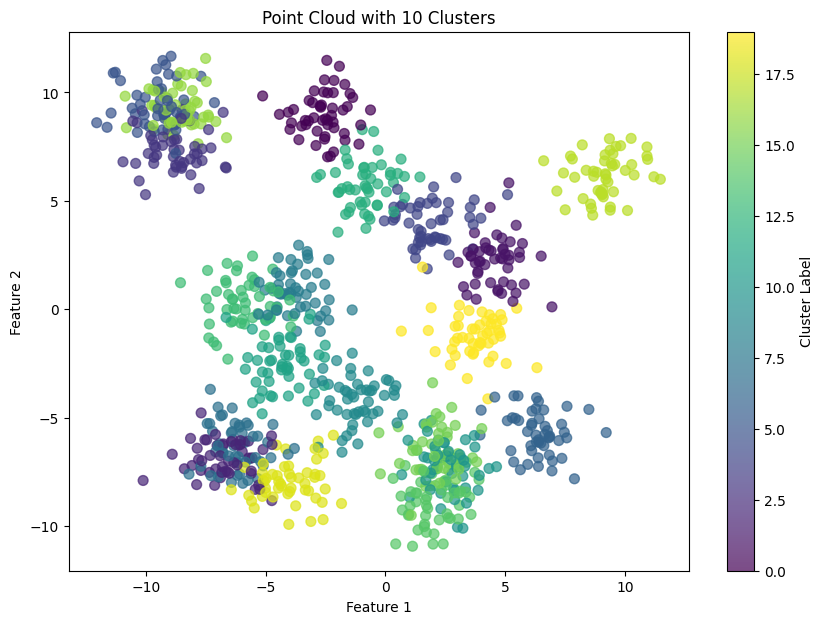

In [218]:
# Test with synthetic data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with 10 clusters
n_samples = 1000  # Total number of points
n_clusters = 20
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

# Plot the generated point cloud
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('Point Cloud with 10 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

kmax = 40
Krange = np.arange(1, kmax + 1)
WCSS = calculate_wcss(X, kmax)

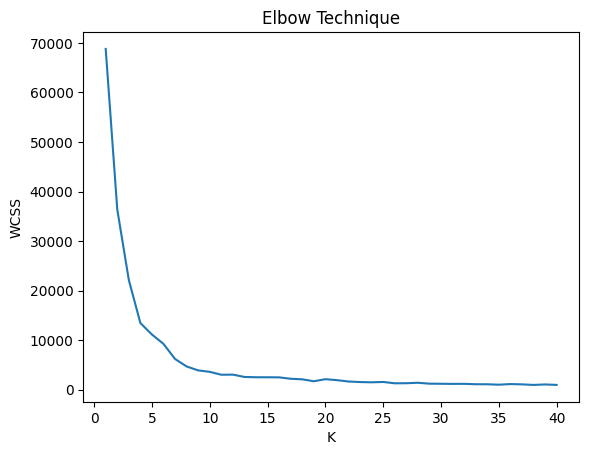

In [219]:
plot_elbow_graph(WCSS, Krange)

In [ ]:
# Perform Elbow Technique on Facebook dataset
print("Hi")
df_array = scaled_df.values

kmax = 60
WCSS = calculate_wcss(df_array, kmax)

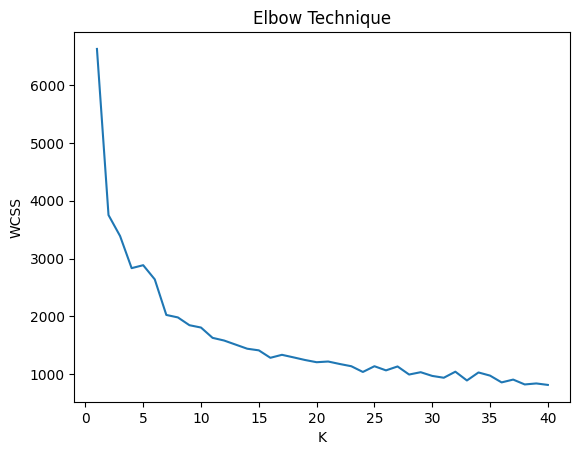

In [214]:
plot_elbow_graph(WCSS, np.arange(1, kmax + 1))

In [210]:
# Report: 
# According to the image, the optimal k is equal to ---